In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [4]:
car_p = pd.read_csv(r"D:\Python\ML projects\7. Car price\car data.csv")

In [6]:
print(car_p.shape)
car_p.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_p.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_p.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
print(car_p.Fuel_Type.value_counts())
print("\n",car_p.Transmission.value_counts())
print("\n",car_p.Seller_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

 Manual       261
Automatic     40
Name: Transmission, dtype: int64

 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [14]:
# encoding categorical columns

car_p.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_p.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_p.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [15]:
car_p.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
# seperating 

x = car_p.drop(columns=['Car_Name','Selling_Price'], axis=1)
y = car_p['Selling_Price']

In [17]:
print(x,y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [34]:
# train test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [35]:
lin_reg_model = LinearRegression()

In [36]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [37]:
predict_train = lin_reg_model.predict(x_train)

In [38]:
# rsquared error

error_r = metrics.r2_score(y_train, predict_train)
print(error_r)

0.8800594535535695


Text(0.5, 1.0, 'Actual vs Predicted price')

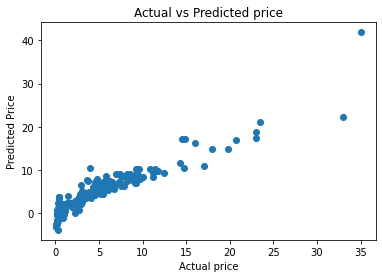

In [39]:
# Visualize actual and predicted prices

plt.scatter(y_train, predict_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price')

In [26]:
# with test data

predict_test = lin_reg_model.predict(x_test)

error_test = metrics.r2_score(y_test, predict_test)
print(error_test)

0.8484549412089455


Text(0.5, 1.0, 'Actual vs Predicted price')

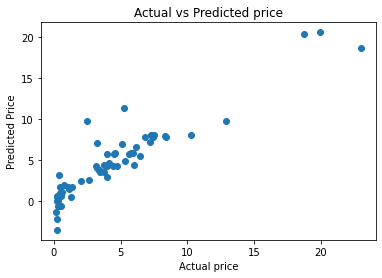

In [27]:
plt.scatter(y_test, predict_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price')

### Linear performs will with positive correlation
### Lasso works well with other multiple feature correlations

In [28]:
lass_reg_model = Lasso()

In [29]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [43]:
predict_train = lass_reg_model.predict(x_train)

In [44]:
# rsquared error

error_r = metrics.r2_score(y_train, predict_train)
print(error_r)

0.8416309679582049


Text(0.5, 1.0, 'Actual vs Predicted price')

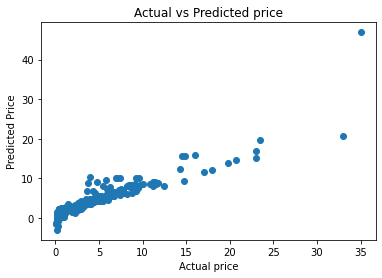

In [45]:
# Visualize actual and predicted prices

plt.scatter(y_train, predict_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price')